# Segmentation

Tasting ... Now, segmenting based on background removal!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure, morphology
from skimage.io import imread, imshow, imsave

In [2]:
def adjust_scale(img, k=255):
    fm = img - img.min()
    return np.rint(k * (fm / fm.max())).astype(np.uint8)
    
def erosao(f, elemento):
    shape = f.shape
    index = elemento.shape[0] // 2

    g = np.zeros(shape)

    for i in range(index, shape[0]-index):
        for j in range(index, shape[1]-index):
            neigbors = f[i-index:i+index+1, j-index:j+index+1]
            if (neigbors * elemento).sum() == elemento.sum():
                g[i, j] = f[i, j]
    return g


def dilatacao(f, elemento):
    index = elemento.shape[0] // 2

    g = np.zeros((f.shape[0]+2*index, f.shape[1]+2*index))

    f_ = np.zeros((f.shape[0]+2*index, f.shape[1]+2*index))
    f_[index:-index, index:-index] = f

    for i in range(index, f_.shape[0]-index):
        for j in range(index, f_.shape[1]-index):
            neigbors = f_[i-index:i+index+1, j-index:j+index+1]
            if (neigbors * elemento).sum() > 0:
                g[i, j] = 1
    r = g[index:-index, index:-index]
    return r


def abertura(f, elemento):
    return dilatacao(erosao(f, elemento), elemento)


def fechamento(f, elemento):
    return erosao(dilatacao(f, elemento), elemento)

In [3]:
target = imread('imgs/target.jpg')
backgr = imread('imgs/background.jpg')

/tmp/ipykernel_13580/2595305077.py:4: RuntimeWarning: overflow encountered in scalar subtract
  if abs(target[i,j] - backgr[i,j]) < 250:


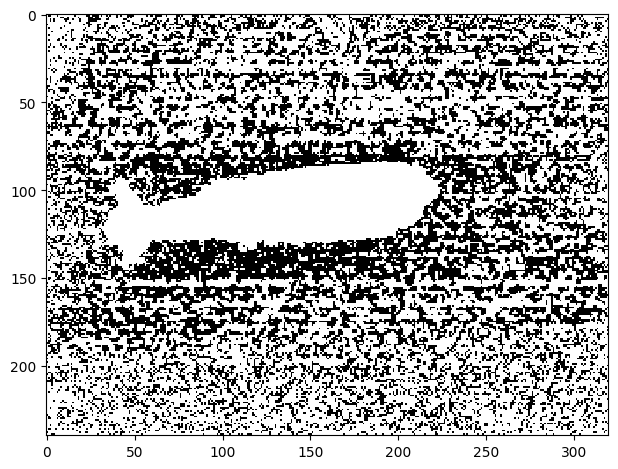

In [4]:
mask = np.zeros(target.shape)
for i in range(target.shape[0]):
    for j in range(target.shape[1]):
        if abs(target[i,j] - backgr[i,j]) < 250:
            mask[i,j] = 1
imshow(mask)            

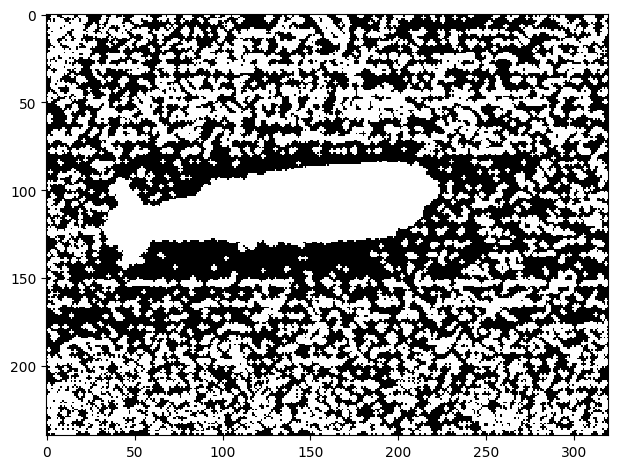

In [5]:
imagem_binaria = abertura(mask, elemento=np.array([
            [0, 1, 0],
            [1, 1, 1],
            [0, 1, 0]
        ]))
imshow(imagem_binaria)

171


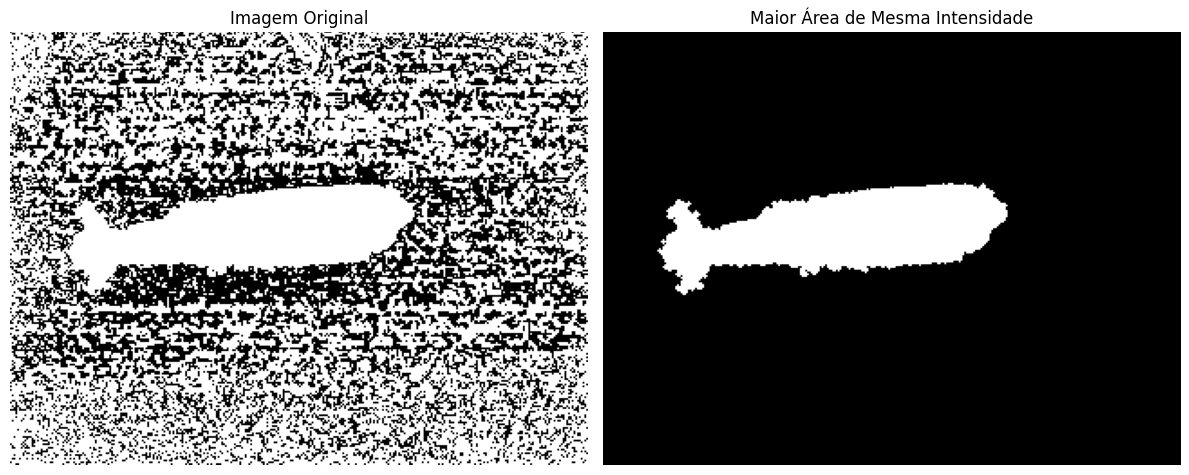

In [6]:
# Rotular componentes conectados
labels = measure.label(imagem_binaria, connectivity=1)

# Medir a área de cada componente
props = measure.regionprops(labels)

# Encontrar a região com a maior área
maior_area = max(props, key=lambda x: x.area)
print(maior_area.label)
# Criar uma máscara para a maior região
maior_area_mascara = (labels == maior_area.label)

# Mostrar a imagem original e a maior área
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(mask, cmap='gray')
ax[0].set_title('Imagem Original')
ax[0].axis('off')

ax[1].imshow(maior_area_mascara, cmap='gray')
ax[1].set_title('Maior Área de Mesma Intensidade')
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [7]:
imsave('imgs/segmented.jpg', target * maior_area_mascara)

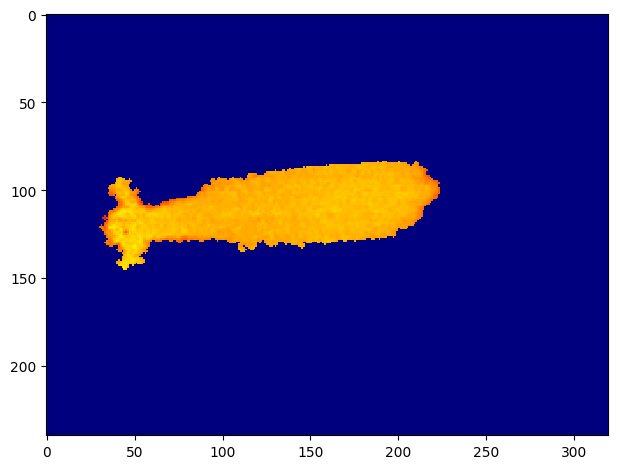

In [12]:
imshow(target * maior_area_mascara, cmap='jet')